The S1210 airfoil was designed for high lift coefficients at low Reynolds numbers, which seems to be of interest for vertical axis wind turbine applications [1, 2]. A slotted variant for VAWTs was analyzed in a wind tunnel and using CFD [3], where the data for this notebook came from. The experimental data is not really close to the results below (which predict  higher lift and lower drag) nor is the experimental data close to the CFD results in paper. Which, interestingly, predict lower lift and higher drag. Looks like a fully turbulent simulation though.

Regardless, this is an interesting example to show what virtual displacements are good for. They are used to modify smooth geometries to model kinks or otherwise difficult geometries.

In addition, this notebook shows how to interactively plot and show the changes in the solution during the Newton iterations.

<IPython.core.display.Javascript object>


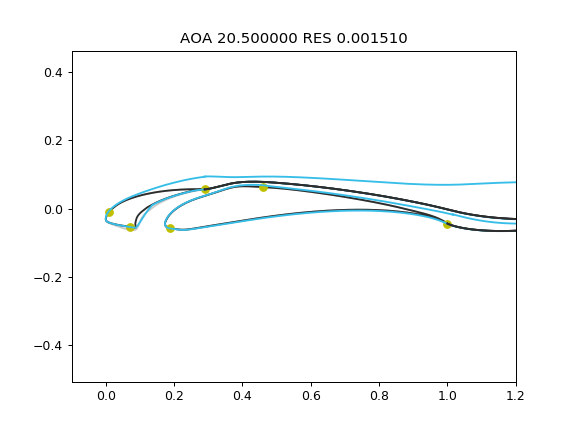

In [21]:
%matplotlib notebook
import viiflow as vf
import viiflowtools.vf_tools as vft
import viiflowtools.vf_plots as vfp
import matplotlib.pyplot as plt
import numpy as np

# Make a plot that will be updated interactively
lines = None
fig,ax = plt.subplots(1,1)

In [23]:
BASE = vft.repanel(vft.read_selig("S1210Base.dat"),200)
SLOT = vft.repanel(vft.read_selig("S1210Slot.dat"),200)
SLOT0 = vft.read_selig("S1210Slot0.dat") # Actual slot shape


# Virtual displacement
[vdSlot,SLOTD] = vft.virtual_displacement_from_geometry(SLOT,SLOT0)
vdSlot[0] = 0.0
vdSlot[-1] = 0.0

AOARANGE = np.arange(5,21,0.5)
#AOARANGE = np.arange(10,-24,-0.5)

# Setup
RE = 200000
ncrit = 9
Mach = 0.0
AOA0 = AOARANGE[0]
s = vf.setup(Re=RE,Ma=Mach,ncrit=ncrit,alpha=AOA0)
s.iterate_wakes = True
s.itermax = 5
s.silent = True

BASE[1,:]-=.5
SLOT[1,:]-=.5

# Set-up and initialize based on inviscid panel solution
(p,bl,x) = vf.init([BASE,SLOT],s)

xn = x.copy()
alv = []
clv = []
cdv = []

for alpha in AOARANGE:
    s.alpha = alpha
    res = None
    grad = None
    for k in range(int(100/s.itermax)): # Make effectively 100 iterations, but show some in between
        [xn,flag,res,grad,_] = vf.iter(xn,bl,p,s,res,grad,[None,vdSlot])
        # Plot geometry
        lines = vfp.plot_geometry(ax,p,bl,lines)
        nres=np.sqrt(np.dot(res.T,res))
        title = "AOA %f RES %f"%(alpha,nres)
        ax.set_title(title)
        #ax.set_xlim([-.1,2.7])
        fig.canvas.draw()
        if nres<2e-3:
            alv.append(alpha)
            clv.append(p.CL)
            cdv.append(bl[0].CD+bl[1].CD)
            print('AL: %f CL: %f CD: %f' % (alpha,clv[-1],cdv[-1]) ) 
            break


AL: 5.000000 CL: 1.453368 CD: 0.029145
AL: 5.500000 CL: 1.504458 CD: 0.029021
AL: 6.000000 CL: 1.556466 CD: 0.028875
AL: 6.500000 CL: 1.606879 CD: 0.029088
AL: 7.000000 CL: 1.657694 CD: 0.029319
AL: 7.500000 CL: 1.706287 CD: 0.030023
AL: 8.000000 CL: 1.754983 CD: 0.030762
AL: 8.500000 CL: 1.803551 CD: 0.031659
AL: 9.000000 CL: 1.852058 CD: 0.032915
AL: 9.500000 CL: 1.898520 CD: 0.034234
AL: 10.000000 CL: 1.944984 CD: 0.035389
AL: 10.500000 CL: 1.991207 CD: 0.036452
AL: 11.000000 CL: 2.036015 CD: 0.037643
AL: 11.500000 CL: 2.079740 CD: 0.038824
AL: 12.000000 CL: 2.125430 CD: 0.039853
AL: 12.500000 CL: 2.167233 CD: 0.041222
AL: 13.000000 CL: 2.211539 CD: 0.042322
AL: 13.500000 CL: 2.253287 CD: 0.043337
AL: 14.000000 CL: 2.297331 CD: 0.044560
AL: 14.500000 CL: 2.339933 CD: 0.045911
AL: 15.000000 CL: 2.381322 CD: 0.049802
AL: 15.500000 CL: 2.425379 CD: 0.054230
AL: 16.000000 CL: 2.468803 CD: 0.058894
AL: 16.500000 CL: 2.507694 CD: 0.063996
AL: 17.000000 CL: 2.547814 CD: 0.069828
AL: 17.500

<IPython.core.display.Javascript object>


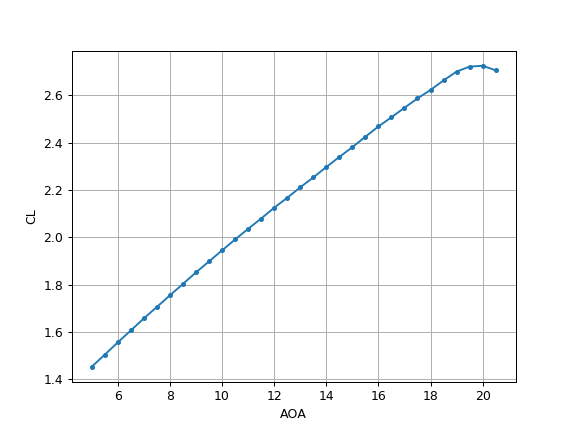

<IPython.core.display.Javascript object>


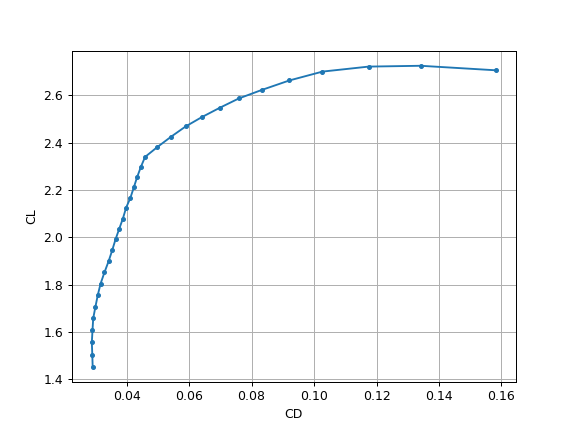

In [24]:
# Make a new plot with the results
fig,ax = plt.subplots(1,1)
ax.plot(alv,clv,marker=".")
ax.set_xlabel('AOA')
ax.set_ylabel('CL')
ax.grid(1)
fig,ax = plt.subplots(1,1)
ax.plot(cdv,clv,marker=".")
ax.set_xlabel('CD')
ax.set_ylabel('CL');
ax.grid(1)

[1] Islam, Mazharul, et al. *Investigation of low reynolds number airfoils for fixed-pitch straight-bladed VAWT.* 47th AIAA Aerospace Sciences Meeting including The New Horizons Forum and Aerospace Exposition. 2009.

[2] Singh, M. A., A. Biswas, and R. D. Misra. *Investigation of self-starting and high rotor solidity on the performance of a three S1210 blade H-type Darrieus rotor.* Renewable energy 76 (2015): 381-387.

[3] Chougule, Prasad, and Søren RK Nielsen. *Simulation of flow over double-element airfoil and wind tunnel test for use in vertical axis wind turbine.* Journal of Physics: Conference Series. Vol. 524. No. 1. IOP Publishing, 2014.